### Neural Network

This notebook will demonstrate my Neural Network implementation against MPLClassifier from scikit-learn.

We use a Fake Dataset and MNIST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

import sys
sys.path.append("..")
from neural_network.nn import Dense, ReLU, Sigmoid, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

#### Fake Dataset

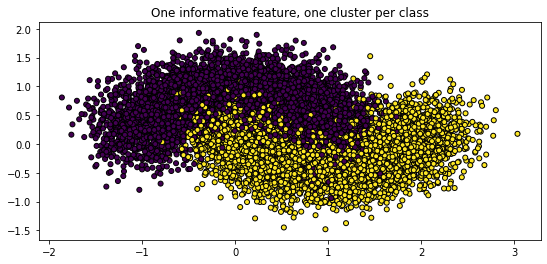

In [2]:
plt.figure(figsize=(9, 4))
plt.title("One informative feature, one cluster per class")
# X, y = make_classification(n_samples=7500, n_features=2, n_classes=3,
#                                n_redundant=0, n_informative=2, n_clusters_per_class=1)
X, y = make_moons(10000, noise=0.3)
# X, y = make_circles(7500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### My Neural Network implementation

Epoch 100/100 =======> Loss: 0.21604 - Acc: 92.0%
Acurácia: 90.0%
Classification report for classifier 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1469
           1       0.90      0.92      0.91      1531

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000


--------------------
Confusion matrix:
 [[1309  160]
 [ 128 1403]]


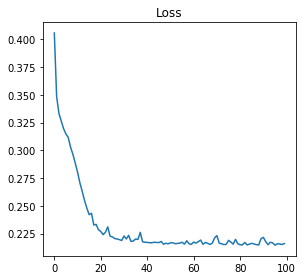

In [5]:
layers = (
    Dense(inputs=2, outputs=32, activation=ReLU),
    Dense(inputs=32, outputs=32, activation=ReLU),
    Dense(inputs=32, outputs=2, activation=Sigmoid),
)

md = NeuralNetwork(layers, batch_size=32)
error = md.train(X_train.copy(), y_train.copy(), epochs=100)

y_pred = md.predict(X_test.copy())
acc = (np.round(np.mean([y == p for y, p in zip(y_pred, y_test)]), 2) * 100)
print(f'Acurácia: {acc}%')

print(f"Classification report for classifier \n{classification_report(y_test, y_pred)}\n")
print('-' * 20)
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred)}")

if len(error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(error)), error)
    plt.tight_layout()
    plt.show()

#### MPLClassifier from scikit-learn

Acurácia: 90.5%
--------------------
Classification report for classifier MLPClassifier:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1469
           1       0.91      0.91      0.91      1531

    accuracy                           0.91      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.91      0.90      3000


--------------------
Confusion matrix:
[[1323  146]
 [ 139 1392]]


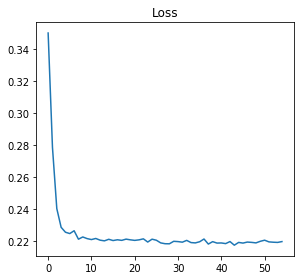

In [6]:
classifier = MLPClassifier(
    max_iter=100,
    solver='sgd',
    batch_size=64,
    shuffle=True,
    learning_rate_init=1e-1,
    random_state=42
)
classifier.fit(X_train.copy(), y_train.copy())

predicted = classifier.predict(X_test.copy())

print(f'Acurácia: {np.round(classifier.score(X_test.copy(), y_test.copy()) * 100, 2)}%')
print('-' * 20)
print(f"Classification report for classifier {classifier.__class__.__name__}:")
print(f"{classification_report(y_test, predicted)}\n")
print('-' * 20)
print(f"Confusion matrix:\n{confusion_matrix(y_test, predicted)}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Loss')
plt.plot(range(classifier.n_iter_), classifier.loss_curve_)
plt.tight_layout()
plt.show()

#### MNIST Dataset Validation

Qtd Digits:  1797


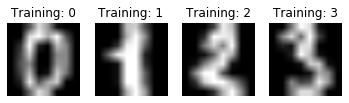

In [7]:
digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title(f'Training: {label}')

n_samples = len(digits.images)
print('Qtd Digits: ', n_samples)

# Data preparation
# Flatten
X = digits.images.reshape((n_samples, -1)).astype('float32')
# Normalization, from 0 to 1
X /= 255.
# Targets
y = digits.target
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Epoch 100/500 =======> Loss: 1.13672 - Acc: 85.0%
Epoch 200/500 =======> Loss: 0.42506 - Acc: 92.0%
Epoch 300/500 =======> Loss: 0.2636 - Acc: 94.0%
Epoch 400/500 =======> Loss: 0.19422 - Acc: 96.0%
Epoch 500/500 =======> Loss: 0.15699 - Acc: 97.0%
Acurácia: 95.0%
Classification report for classifier 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      0.88      0.88        52
           2       1.00      0.94      0.97        53
           3       0.98      0.93      0.95        54
           4       0.98      0.98      0.98        48
           5       0.93      0.95      0.94        57
           6       0.95      0.98      0.97        60
           7       0.95      0.98      0.96        53
           8       0.96      0.90      0.93        61
           9       0.87      0.95      0.91        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95    

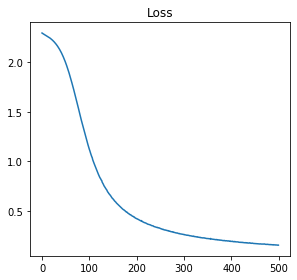

In [8]:
layers = (
    Dense(inputs=64, outputs=100, activation=ReLU),
    Dense(inputs=100, outputs=10, activation=Softmax),
)

md = NeuralNetwork(layers, batch_size=64)
error = md.train(X_train.copy(), y_train.copy(), epochs=500)

y_pred = md.predict(X_test.copy())
acc = (np.round(np.mean([y == p for y, p in zip(y_pred, y_test)]), 2) * 100)
print(f'Acurácia: {acc}%')

print(f"Classification report for classifier \n{classification_report(y_test, y_pred)}\n")
print('-' * 20)
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

if len(error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(error)), error)
    plt.tight_layout()
    plt.show()

Acurácia: 95.37%
--------------------
Classification report for classifier MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.87      0.90      0.89        52
           2       1.00      0.94      0.97        53
           3       1.00      0.94      0.97        54
           4       0.96      1.00      0.98        48
           5       0.96      0.93      0.95        57
           6       0.98      0.98      0.98        60
           7       1.00      0.92      0.96        53
           8       0.93      0.93      0.93        61
           9       0.86      0.98      0.92        57

    accuracy                           0.95       540
   macro avg       0.96      0.95      0.96       540
weighted avg       0.96      0.95      0.95       540


--------------------
Confusion matrix:
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  3  2]
 [ 0  3 50  0  0  0  0  0  0  0]
 [ 0  0  0 

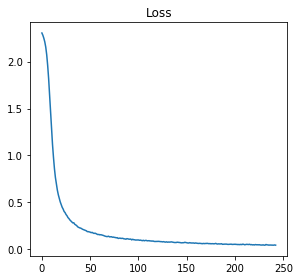

In [9]:
classifier = MLPClassifier(
    max_iter=500,
    solver='sgd',
    batch_size=64,
    shuffle=True,
    learning_rate_init=1e-1,
    random_state=42
)
classifier.fit(X_train.copy(), y_train.copy())

predicted = classifier.predict(X_test.copy())
print(f'Acurácia: {np.round(classifier.score(X_test.copy(), y_test.copy()) * 100, 2)}%')
print('-' * 20)
print(f"Classification report for classifier {classifier.__class__.__name__}:")
print(f"{classification_report(y_test, predicted)}\n")
print('-' * 20)
print(f"Confusion matrix:\n {confusion_matrix(y_test, predicted)}")

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f'Loss')
plt.plot(range(classifier.n_iter_), classifier.loss_curve_)
plt.tight_layout()
plt.show()